# Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
 
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [3]:
# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=50, random_state=42)
 
# Melatih model dengan data latih
model.fit(X_train, y_train)
 
# Membuat prediksi untuk data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Mendeteksi Overfitting

1. Evaluasi Performa pada Data Latih dan Data Uji

In [4]:
# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
 
# Menampilkan hasil MSE
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 9.904697258622977e-32
Test MSE: 0.5265256772490148


Hasil evaluasi model menunjukkan bahwa Training MSE sebesar 9.90e-32 mengindikasikan performa yang sangat baik pada data latih dengan kesalahan prediksi hampir mendekati nol. Namun, Test MSE sebesar 0.5265 yang lebih tinggi menunjukkan bahwa model tidak dapat memprediksi data uji dengan akurat. 

Perbedaan signifikan antara kedua nilai MSE ini mengindikasikan bahwa model mengalami overfitting, yaitu ketika model terlalu menyesuaikan diri dengan data latih sehingga gagal dalam generalisasi pada data baru.

2. Learning Curve

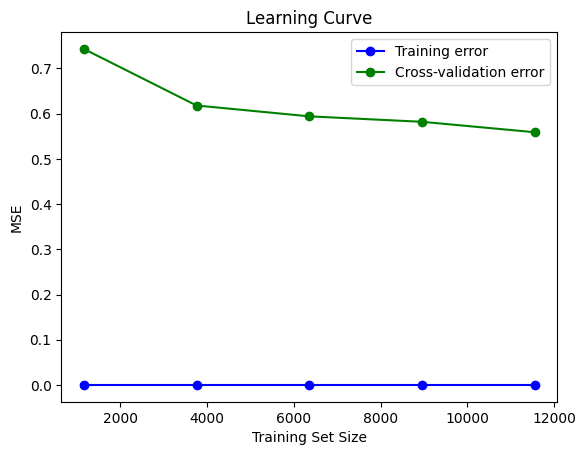

In [5]:
# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
 
# Menghitung rata-rata dan standar deviasi
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
 
# Plot learning curve
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

Pada gambar di atas, dapat kita lihat bahwa learning curve menunjukkan jarak yang sangat jauh antara training error dan cross-validation error, hal ini memberikan indikasi jelas bahwa terjadi overfitting. 

## Mengatasi Overfitting

1. **Cross-validation**

In [6]:
# Menggunakan cross-validation dengan 5 fold
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
 
# Menampilkan hasil cross-validation
print(f'Cross-Validation MSE: {-cross_val_scores.mean()}')

Cross-Validation MSE: 0.5562691658603186


Dengan cross-validation, performa model diuji lebih menyeluruh dan lebih adil karena data dibagi menjadi beberapa bagian untuk diuji secara bergantian. Hasil Cross-Validation MSE yang lebih mendekati Test MSE (0.556 vs. 0.526) menunjukkan bahwa model lebih konsisten dan mampu menghindari overfitting.

2. **Regularization (Max Depth, Min Samples Split, Min Samples Leaf)**

In [7]:
# Membuat model Decision Tree dengan kedalaman yang lebih kecil
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)
 
# Evaluasi pada data latih dan uji
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)
 
# Hitung MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)
 
print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Test MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Test MSE (After Regularization): 0.5210801561811793


Setelah menerapkan regularisasi pada model Decision Tree, hasil sebagai berikut didapatkan.

- Training MSE (Setelah Regularisasi): 0.4928
- Test MSE (Setelah Regularisasi): 0.5211

Hasil ini menunjukkan peningkatan dibandingkan sebelumnya, yaitu perbedaan antara Training MSE dan Test MSE menjadi lebih kecil. Ini berarti model telah menjadi lebih seimbang dan tidak lagi terlalu fokus pada data latih (overfitting) karena performa dalam data uji sekarang lebih mendekati performa pada data latih. Regularisasi berhasil membuat model lebih mampu memprediksi data baru dengan lebih akurat.

3. **Pruning (Pruning Manual pada Kedalaman Pohon)**

In [8]:
# Menggunakan ccp_alpha untuk pruning (Cost Complexity Pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
 
# Melatih model dengan pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)
 
# Membuat prediksi
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)
 
# Menghitung MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)
 
print(f'Pruned Model Training MSE: {train_mse_pruned}')
print(f'Pruned Model Test MSE: {test_mse_pruned}')

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


Setelah melakukan pruning pada model Decision Tree, hasil yang diperoleh sebagai berikut.

- Pruned Model Training MSE: 0.9189
- Pruned Model Test MSE: 0.9194

Hasil ini menunjukkan bahwa setelah diterapkan pruning, kesalahan pada data latih dan data uji menjadi 
hampir sama. Ini adalah tanda bahwa model telah berhasil mengurangi overfitting karena perbedaan antara MSE pada data latih dan data uji sudah sangat kecil. Meskipun nilai MSE pada data latih meningkat dibandingkan model sebelumnya, kemampuan model untuk melakukan generalisasi dalam data baru menjadi lebih baik dan lebih stabil.

4. **Data Augmentation**

In [9]:
# Menambahkan sedikit noise ke data sebagai augmentasi
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)
 
# Melatih ulang model dengan augmented data
model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)
 
# Membuat prediksi
y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)
 
# Menghitung MSE
train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)
 
print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')


Augmented Data Training MSE: 0.3142481766072424
Augmented Data Test MSE: 0.5207875959153032


Setelah menerapkan data augmentation dengan menambahkan noise pada data latih, hasil yang diperoleh sebagai berikut.

- Augmented Data Training MSE: 0.3193
- Augmented Data Test MSE: 0.5219

Dari hasil tersebut, kita dapat melihat perubahan signifikan setelah data augmentation. Sebelumnya, Training MSE sangat rendah, mendekati nol, menunjukkan overfitting yang besar. Dengan menerapkan data augmentation, Training MSE naik menjadi 0.3193. 

Ini menunjukkan bahwa model sekarang lebih general dan tidak terlalu pas dengan data latih. Test MSE tetap hampir sama pada 0.5219, yang menunjukkan performa model dalam data uji tidak banyak berubah.

Secara keseluruhan, data augmentation membantu mengurangi overfitting dengan membuat model lebih adaptif terhadap variasi dalam data latih meskipun hasil pada data uji tetap stabil.

5. **Dropout**

Dropout adalah teknik regulasi yang digunakan untuk mencegah overfitting dalam model machine learning, khususnya neural networks. Teknik ini bekerja dengan "menghilangkan" beberapa neuron secara acak selama pelatihan sehingga model tidak terlalu bergantung pada neuron tertentu dan belajar untuk membuat keputusan berdasarkan fitur yang lebih robust.

Namun, untuk masalah yang kita hadapi, yaitu model Decision Tree, kita tidak dapat menerapkan dropout secara langsung. Sebagai gantinya, kita menggunakan pendekatan lain yang mirip, yaitu Random Forest. Random Forest adalah ensemble method yang menggunakan banyak pohon keputusan untuk meningkatkan kinerja model dan mengurangi overfitting.

In [10]:
from sklearn.ensemble import RandomForestRegressor
 
# Inisialisasi Random Forests dengan n_estimators (jumlah pohon)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
 
# Melatih model
model_rf.fit(X_train, y_train)
 
# Membuat prediksi
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
 
# Menghitung MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
 
print(f'Random Forest Training MSE: {train_mse_rf}')
print(f'Random Forest Test MSE: {test_mse_rf}')

Random Forest Training MSE: 0.1694494883912745
Random Forest Test MSE: 0.2944600120852388


Dengan menerapkan Random Forest, hasil MSE pada data latih adalah 0.1694 dan data uji adalah 0.2945. 

Meskipun MSE dalam data latih sedikit meningkat dibandingkan dengan model awal, MSE pada data uji menunjukkan penurunan yang signifikan. Ini menandakan bahwa model Random Forest lebih baik dalam mengatasi overfitting dan memberikan hasil yang lebih stabil saat diterapkan pada data baru.